In [1]:
# error
# transforms.Normalize((0.5,), (0.5,))
# (1, 28, 28)

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [3]:
DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


In [23]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5))])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# transform = simply dictates any image manipulations that you wish to apply on your images
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100, shuffle=False)

In [5]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

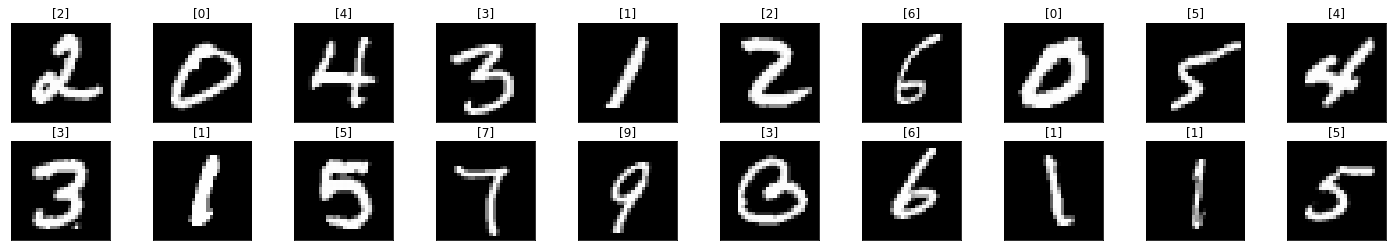

In [6]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

In [7]:
class Classifier(nn.Module):
    def __init__(self, D_in, H1, H2, D_out):
        super().__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [8]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [10]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
    
    running_loss = 0.0
    running_corrects = 0.0
    val_running_loss = 0.0
    val_running_corrects = 0.0
    
    for inputs, labels in training_loader:
        inputs = inputs.view(inputs.shape[0], -1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
    else:
        with torch.no_grad():
            for val_inputs, val_labels in validation_loader:
                val_inputs = val_inputs.view(val_inputs.shape[0], -1)
                val_outputs = model(val_inputs)
                loss = criterion(val_outputs, val_labels)
                
                _, val_preds = torch.max(val_outputs, 1)
                val_running_loss += loss.item()
                val_running_corrects += torch.sum(val_preds == val_labels.data)
                
        epoch_loss = running_loss/len(training_loader)
        epoch_acc = running_corrects.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(epoch_acc)
        
        val_epoch_loss = val_running_loss/len(validation_loader)
        val_epoch_acc = val_running_corrects.float() / len(validation_loader)
        val_running_loss_history.append(val_epoch_loss)
        val_running_corrects_history.append(val_epoch_acc)
        print('epoch : ', (e+1))
        print('training loss: {:.4f}, training acc : {:.4f}'.format(epoch_loss, epoch_acc))
        print('validation loss: {:.4f}, validation acc : {:.4f}'.format(val_epoch_loss, val_epoch_acc))
        

epoch :  1
training loss: 0.4330, 87.3917
validation loss: 8.1541, 92.5000
epoch :  2
training loss: 0.2066, 93.8683
validation loss: 9.4205, 94.4300
epoch :  3
training loss: 0.1529, 95.4083
validation loss: 10.1552, 95.7700
epoch :  4
training loss: 0.1199, 96.3117
validation loss: 10.9431, 95.9300
epoch :  5
training loss: 0.1044, 96.7783
validation loss: 11.3820, 96.2500
epoch :  6
training loss: 0.0867, 97.2550
validation loss: 12.6732, 96.3900
epoch :  7
training loss: 0.0803, 97.4850
validation loss: 12.9251, 96.3900
epoch :  8
training loss: 0.0677, 97.8350
validation loss: 14.3219, 97.0700
epoch :  9
training loss: 0.0625, 97.9917
validation loss: 14.1199, 97.1500
epoch :  10
training loss: 0.0591, 98.0650
validation loss: 14.1872, 97.3100
epoch :  11
training loss: 0.0509, 98.3283
validation loss: 14.9766, 97.4300
epoch :  12
training loss: 0.0465, 98.4950
validation loss: 14.9011, 97.1400
epoch :  13
training loss: 0.0440, 98.5183
validation loss: 16.0931, 97.1800
epoch :  1

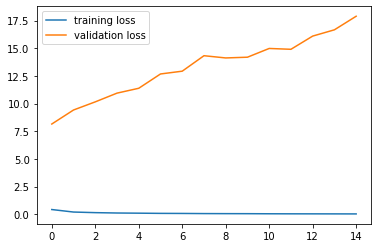

In [15]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

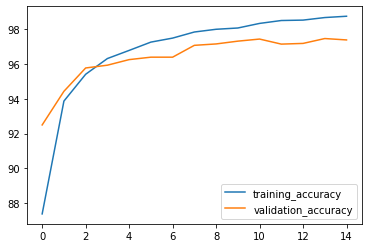

In [14]:
plt.plot(running_corrects_history, label="training_accuracy")
plt.plot(val_running_corrects_history, label="validation_accuracy")
plt.legend()

<Response [200]>


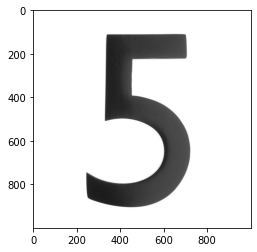

In [21]:
import requests
from PIL import Image
import PIL
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)
print(response)

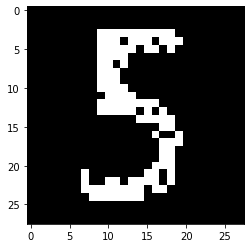

In [24]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(im_convert(img))

In [26]:
img = img.view(img.shape[0], -1)
output = model(img)
_, pred = torch.max(output, 1)
print(pred.item())

5


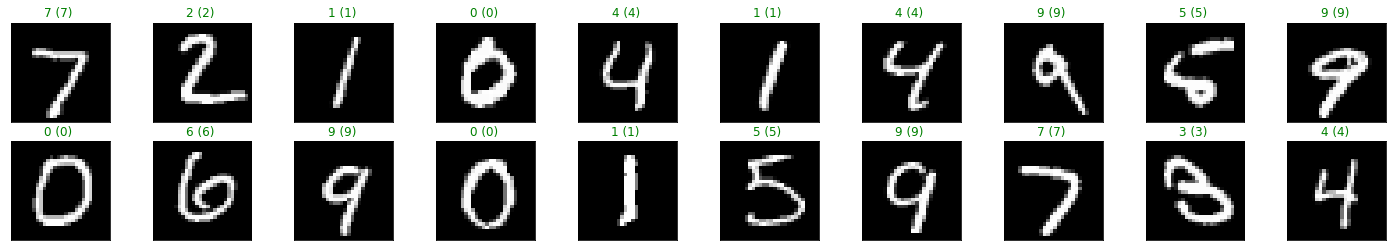

In [29]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images_ = images.view(images.shape[0], -1)
output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({}) ".format(str(preds[idx].item()), str(labels[idx].item())), color = ('green' if preds[idx] == labels[idx] else 'red'))